In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')


In [3]:
df=pd.read_csv('agriculture.csv')

In [4]:
df=df.sample(frac=0.25)

In [5]:
df.shape


(86352, 10)

In [6]:
df.isnull().sum()

State                  0
District               0
Crop                   6
Year                   0
Season                 1
Area                   7
Area Units             0
Production          1290
Production Units       0
Yield                  7
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 86352 entries, 121231 to 146124
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             86352 non-null  object 
 1   District          86352 non-null  object 
 2   Crop              86346 non-null  object 
 3   Year              86352 non-null  object 
 4   Season            86351 non-null  object 
 5   Area              86345 non-null  float64
 6   Area Units        86352 non-null  object 
 7   Production        85062 non-null  float64
 8   Production Units  86352 non-null  object 
 9   Yield             86345 non-null  float64
dtypes: float64(3), object(7)
memory usage: 7.2+ MB


In [8]:
df.describe(include='object')

,State,District,Crop,Year,Season,Area Units,Production Units
count,86352,86352,86346,86352,86351,86352,86352
unique,36,721,56,24,6,1,3
top,Uttar Pradesh,BIJAPUR,Rice,2019-20,Kharif,Hectare,Tonnes
freq,11172,327,5434,4744,34694,86352,82875


In [9]:
df.dropna(inplace=True)
df.drop(df[df['Crop']== 'Dry Ginger'].index, inplace = True)

In [10]:
df['Crop'].value_counts()

Crop
Rice                     5421
Maize                    5163
Moong(Green Gram)        3655
Urad                     3613
Sesamum                  3185
Groundnut                3063
Onion                    2752
Wheat                    2749
Rapeseed &Mustard        2710
Arhar/Tur                2671
Sugarcane                2658
Potato                   2560
Gram                     2514
Jowar                    2452
Dry chillies             2255
Bajra                    1929
Peas & beans (Pulses)    1780
Sunflower                1767
Small millets            1736
Cotton(lint)             1589
Masoor                   1566
Ragi                     1485
Turmeric                 1465
Barley                   1453
Sweet potato             1425
Linseed                  1413
Other Kharif pulses      1396
Horse-gram               1296
Garlic                   1270
Coriander                1260
Soyabean                 1259
Ginger                   1176
Castor seed              1127
Other

# Exploratory  Data Analysis

In [11]:
df


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
121231,Tripura,WEST TRIPURA,Arhar/Tur,2009-10,Kharif,257.0,Hectare,185.0,Tonnes,0.719844
112176,Meghalaya,EAST JAINTIA HILLS,Maize,2009-10,Kharif,3028.0,Hectare,3590.0,Tonnes,1.185601
33978,Tamil Nadu,THENI,Sweet potato,2002-03,Whole Year,2.0,Hectare,27.0,Tonnes,13.500000
337524,Uttar Pradesh,LUCKNOW,Linseed,1998-99,Rabi,73.0,Hectare,28.0,Tonnes,0.383562
177092,Andhra Pradesh,VISAKHAPATANAM,Cowpea(Lobia),2015-16,Rabi,554.0,Hectare,187.0,Tonnes,0.337545
...,...,...,...,...,...,...,...,...,...,...
239025,Haryana,MAHENDRAGARH,Garlic,2017-18,Whole Year,12.0,Hectare,220.0,Tonnes,18.333333
111610,Manipur,CHURACHANDPUR,Banana,2007-08,Whole Year,4400.0,Hectare,56590.0,Tonnes,12.861364
318259,Madhya Pradesh,UMARIA,Barley,1998-99,Rabi,700.0,Hectare,400.0,Tonnes,0.571429
134789,Assam,DIMA HASAO,Rice,2011-12,Autumn,6590.0,Hectare,8923.0,Tonnes,1.354021


In [12]:
df['State'].value_counts()

State
Uttar Pradesh                  11135
Madhya Pradesh                  7366
Karnataka                       6789
Bihar                           6102
Rajasthan                       5112
Assam                           4569
Maharashtra                     4432
Tamil Nadu                      4421
Andhra Pradesh                  4134
Odisha                          4011
Chhattisgarh                    3633
Gujarat                         3363
West Bengal                     3186
Uttarakhand                     1686
Haryana                         1646
Nagaland                        1367
Jharkhand                       1267
Himachal Pradesh                1246
Telangana                       1161
Kerala                          1155
Jammu and Kashmir               1117
Meghalaya                       1094
Arunachal Pradesh               1088
Punjab                          1020
Manipur                          778
Tripura                          647
Mizoram                         

In [13]:
df.duplicated().sum()

0

**So,we don't have any duplicate value **

In [14]:
g=df.groupby('State')

In [15]:
dist=g.get_group('Bihar')

In [16]:
dist

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
7001,Bihar,SAHARSA,Moong(Green Gram),2002-03,Summer,23959.0,Hectare,20725.0,Tonnes,0.865019
306201,Bihar,ARARIA,Onion,1998-99,Whole Year,451.0,Hectare,4032.0,Tonnes,8.940133
7551,Bihar,PATNA,Ragi,2001-02,Kharif,22.0,Hectare,19.0,Tonnes,0.863636
183618,Bihar,GOPALGANJ,Small millets,2013-14,Kharif,70.0,Hectare,55.0,Tonnes,0.785714
6813,Bihar,BEGUSARAI,Mesta,2001-02,Kharif,13.0,Hectare,85.0,Bales,6.538462
...,...,...,...,...,...,...,...,...,...,...
136908,Bihar,JAMUI,Moong(Green Gram),2010-11,Kharif,36.0,Hectare,24.0,Tonnes,0.666667
47814,Bihar,SHEOHAR,Barley,2006-07,Rabi,5.0,Hectare,5.0,Tonnes,1.000000
307336,Bihar,BUXAR,Rice,1998-99,Winter,90730.0,Hectare,221735.0,Tonnes,2.443899
136956,Bihar,MADHUBANI,Moong(Green Gram),2012-13,Summer,5424.0,Hectare,3504.0,Tonnes,0.646018


In [17]:
dist[dist['District']=='ARARIA']

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
306201,Bihar,ARARIA,Onion,1998-99,Whole Year,451.0,Hectare,4032.0,Tonnes,8.940133
308820,Bihar,ARARIA,Wheat,1997-98,Rabi,41719.0,Hectare,70134.0,Tonnes,1.681105
6103,Bihar,ARARIA,Jute,2002-03,Kharif,29233.0,Hectare,203657.0,Bales,6.966681
5232,Bihar,ARARIA,Arhar/Tur,2002-03,Kharif,302.0,Hectare,369.0,Tonnes,1.221854
7148,Bihar,ARARIA,Other Rabi pulses,2003-04,Rabi,127.0,Hectare,94.0,Tonnes,0.740157
...,...,...,...,...,...,...,...,...,...,...
48309,Bihar,ARARIA,Khesari,2005-06,Rabi,3026.0,Hectare,1861.0,Tonnes,0.615003
307281,Bihar,ARARIA,Rice,2000-01,Autumn,88865.0,Hectare,84685.0,Tonnes,0.952962
91032,Bihar,ARARIA,Linseed,2009-10,Rabi,1659.0,Hectare,1404.0,Tonnes,0.846293
304648,Bihar,ARARIA,Gram,1998-99,Rabi,1052.0,Hectare,1129.0,Tonnes,1.073194


In [18]:
df['Crop'].value_counts().shape

(55,)

In [19]:
df['Year'].value_counts()

Year
2019-20    4677
2018-19    4541
2017-18    4488
2016-17    4351
2015-16    4071
2011-12    4014
2013-14    3991
2014-15    3911
2008-09    3693
2009-10    3687
2010-11    3669
2003-04    3652
2012-13    3628
2006-07    3609
2007-08    3570
2002-03    3520
2005-06    3433
2000-01    3433
2004-05    3422
2001-02    3272
1999-00    3258
1998-99    2996
1997-98    2088
2020-21      87
Name: count, dtype: int64

In [20]:
df['Season'].value_counts()

Season
Kharif        34101
Rabi          24862
Whole Year    16786
Summer         5456
Winter         2087
Autumn         1769
Name: count, dtype: int64

***We have to change Kharif and Rabi as a season***

In [21]:
df['Area Units'].value_counts()

Area Units
Hectare    85061
Name: count, dtype: int64

In [22]:
df['Production Units'].value_counts()

Production Units
Tonnes    81654
Bales      2681
Nuts        726
Name: count, dtype: int64

***Here ,we see Bales and nuts are two different unit of productions to convert it into tonnes for our convinence .as we know ***

***1 Bales=1.7 Tonnes***

***1 Nuts =1/50 Tonnes***

In [23]:
def change_units(df):
    if df['Production Units']=='Bales':
        data_production=df['Production']*1.7
        return data_production
    elif df['Production Units'] == 'Nuts':
        data_production = df['Production'] / 50
        return data_production
    else:
        return df['Production']
    
df["Production"] = df.apply(change_units,axis=1)

In [24]:
df

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
121231,Tripura,WEST TRIPURA,Arhar/Tur,2009-10,Kharif,257.0,Hectare,185.0,Tonnes,0.719844
112176,Meghalaya,EAST JAINTIA HILLS,Maize,2009-10,Kharif,3028.0,Hectare,3590.0,Tonnes,1.185601
33978,Tamil Nadu,THENI,Sweet potato,2002-03,Whole Year,2.0,Hectare,27.0,Tonnes,13.500000
337524,Uttar Pradesh,LUCKNOW,Linseed,1998-99,Rabi,73.0,Hectare,28.0,Tonnes,0.383562
177092,Andhra Pradesh,VISAKHAPATANAM,Cowpea(Lobia),2015-16,Rabi,554.0,Hectare,187.0,Tonnes,0.337545
...,...,...,...,...,...,...,...,...,...,...
239025,Haryana,MAHENDRAGARH,Garlic,2017-18,Whole Year,12.0,Hectare,220.0,Tonnes,18.333333
111610,Manipur,CHURACHANDPUR,Banana,2007-08,Whole Year,4400.0,Hectare,56590.0,Tonnes,12.861364
318259,Madhya Pradesh,UMARIA,Barley,1998-99,Rabi,700.0,Hectare,400.0,Tonnes,0.571429
134789,Assam,DIMA HASAO,Rice,2011-12,Autumn,6590.0,Hectare,8923.0,Tonnes,1.354021


# Data Visualisation

<Axes: xlabel='Season', ylabel='count'>

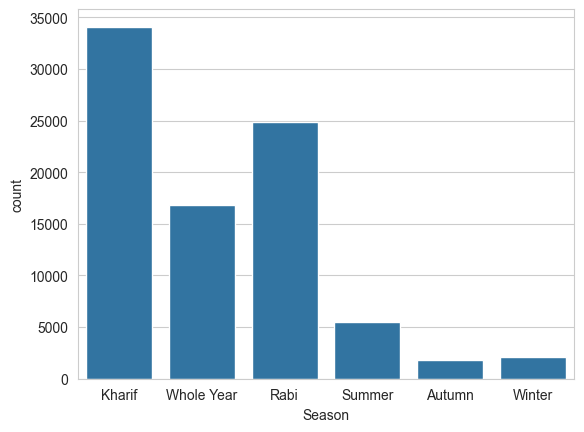

In [25]:
sns.countplot(x=df['Season'])

**In india Kharif and Rabi crops are most harvested crop ,as we can see from our graph**

<Axes: xlabel='Season', ylabel='Production'>

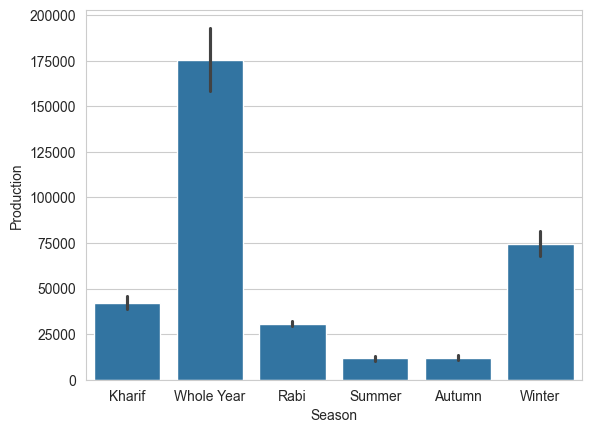

In [26]:
sns.barplot(x=df['Season'],y=df['Production'])

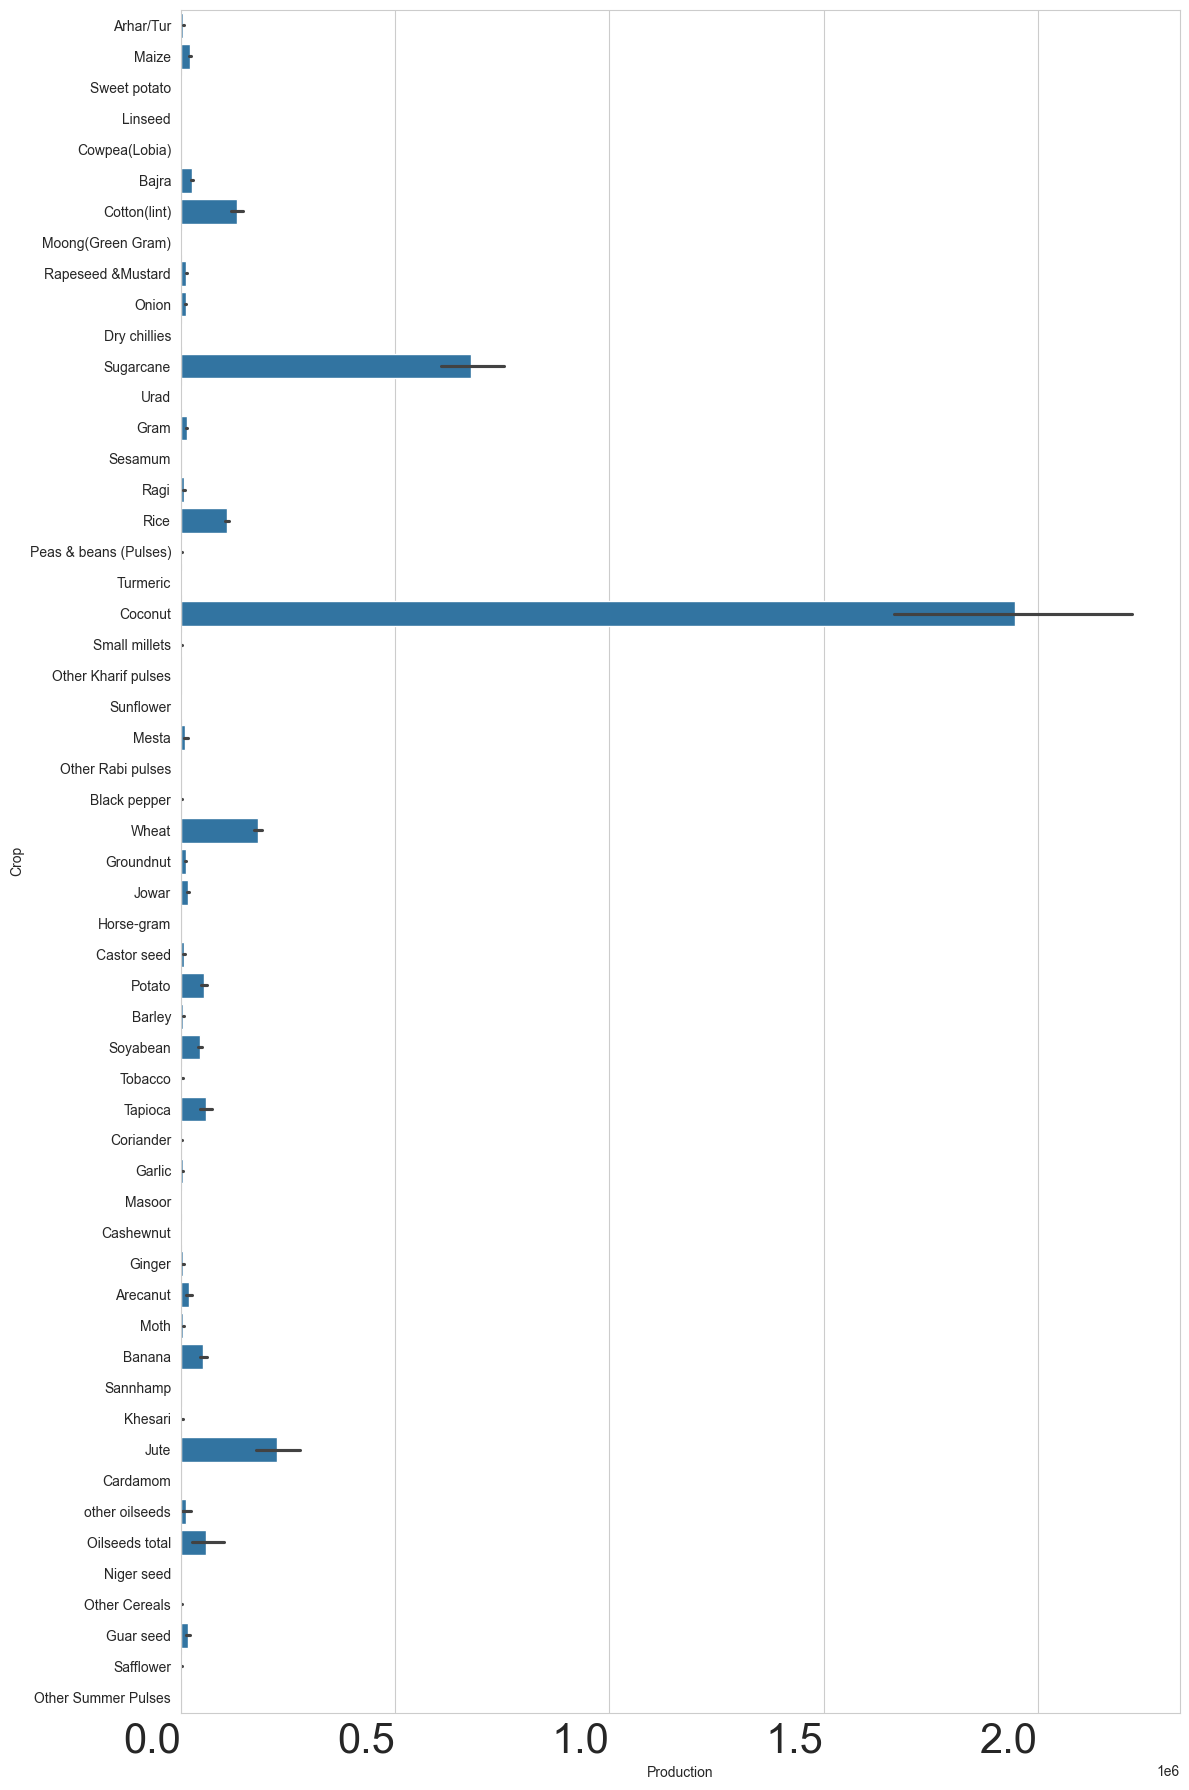

In [27]:
plt.figure(figsize=(12,18))
ax=sns.barplot(x=df['Production'],y=df['Crop'])
plt.setp(ax.get_xticklabels(),rotation=0, ha="right",fontsize=30)
plt.tight_layout()
plt.show()

***Since Coconut production is away ahead from other production, to visualise other's crop we have to ignore Coconut and Sugarcane***

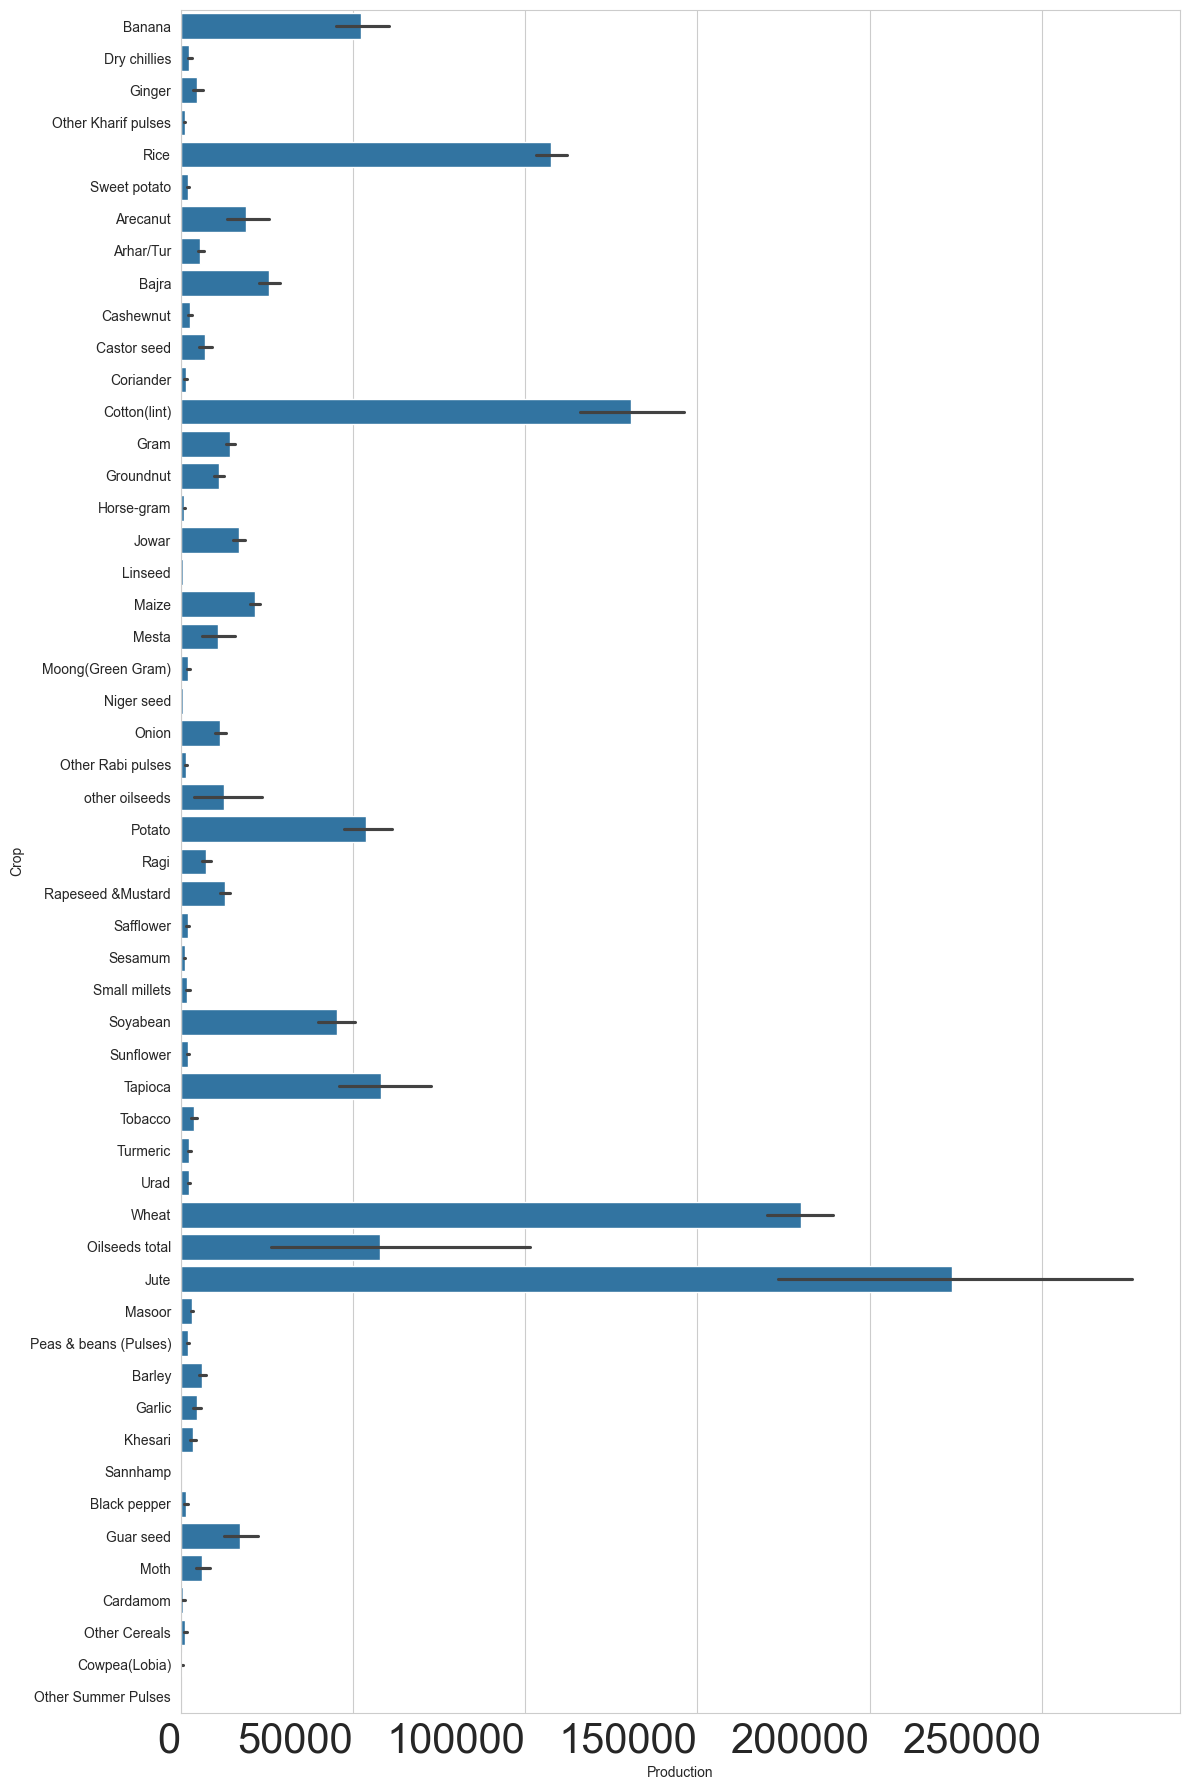

In [28]:
plt.figure(figsize=(12,18))
ax=sns.barplot(x=df['Production'],y=df[(df['Crop']!='Coconut') & (df['Crop']!='Sugarcane')].Crop)
plt.setp(ax.get_xticklabels(),rotation=0, ha="right",fontsize=30)
plt.tight_layout()
plt.show()



***Since, Coconut and Sugarcane ***

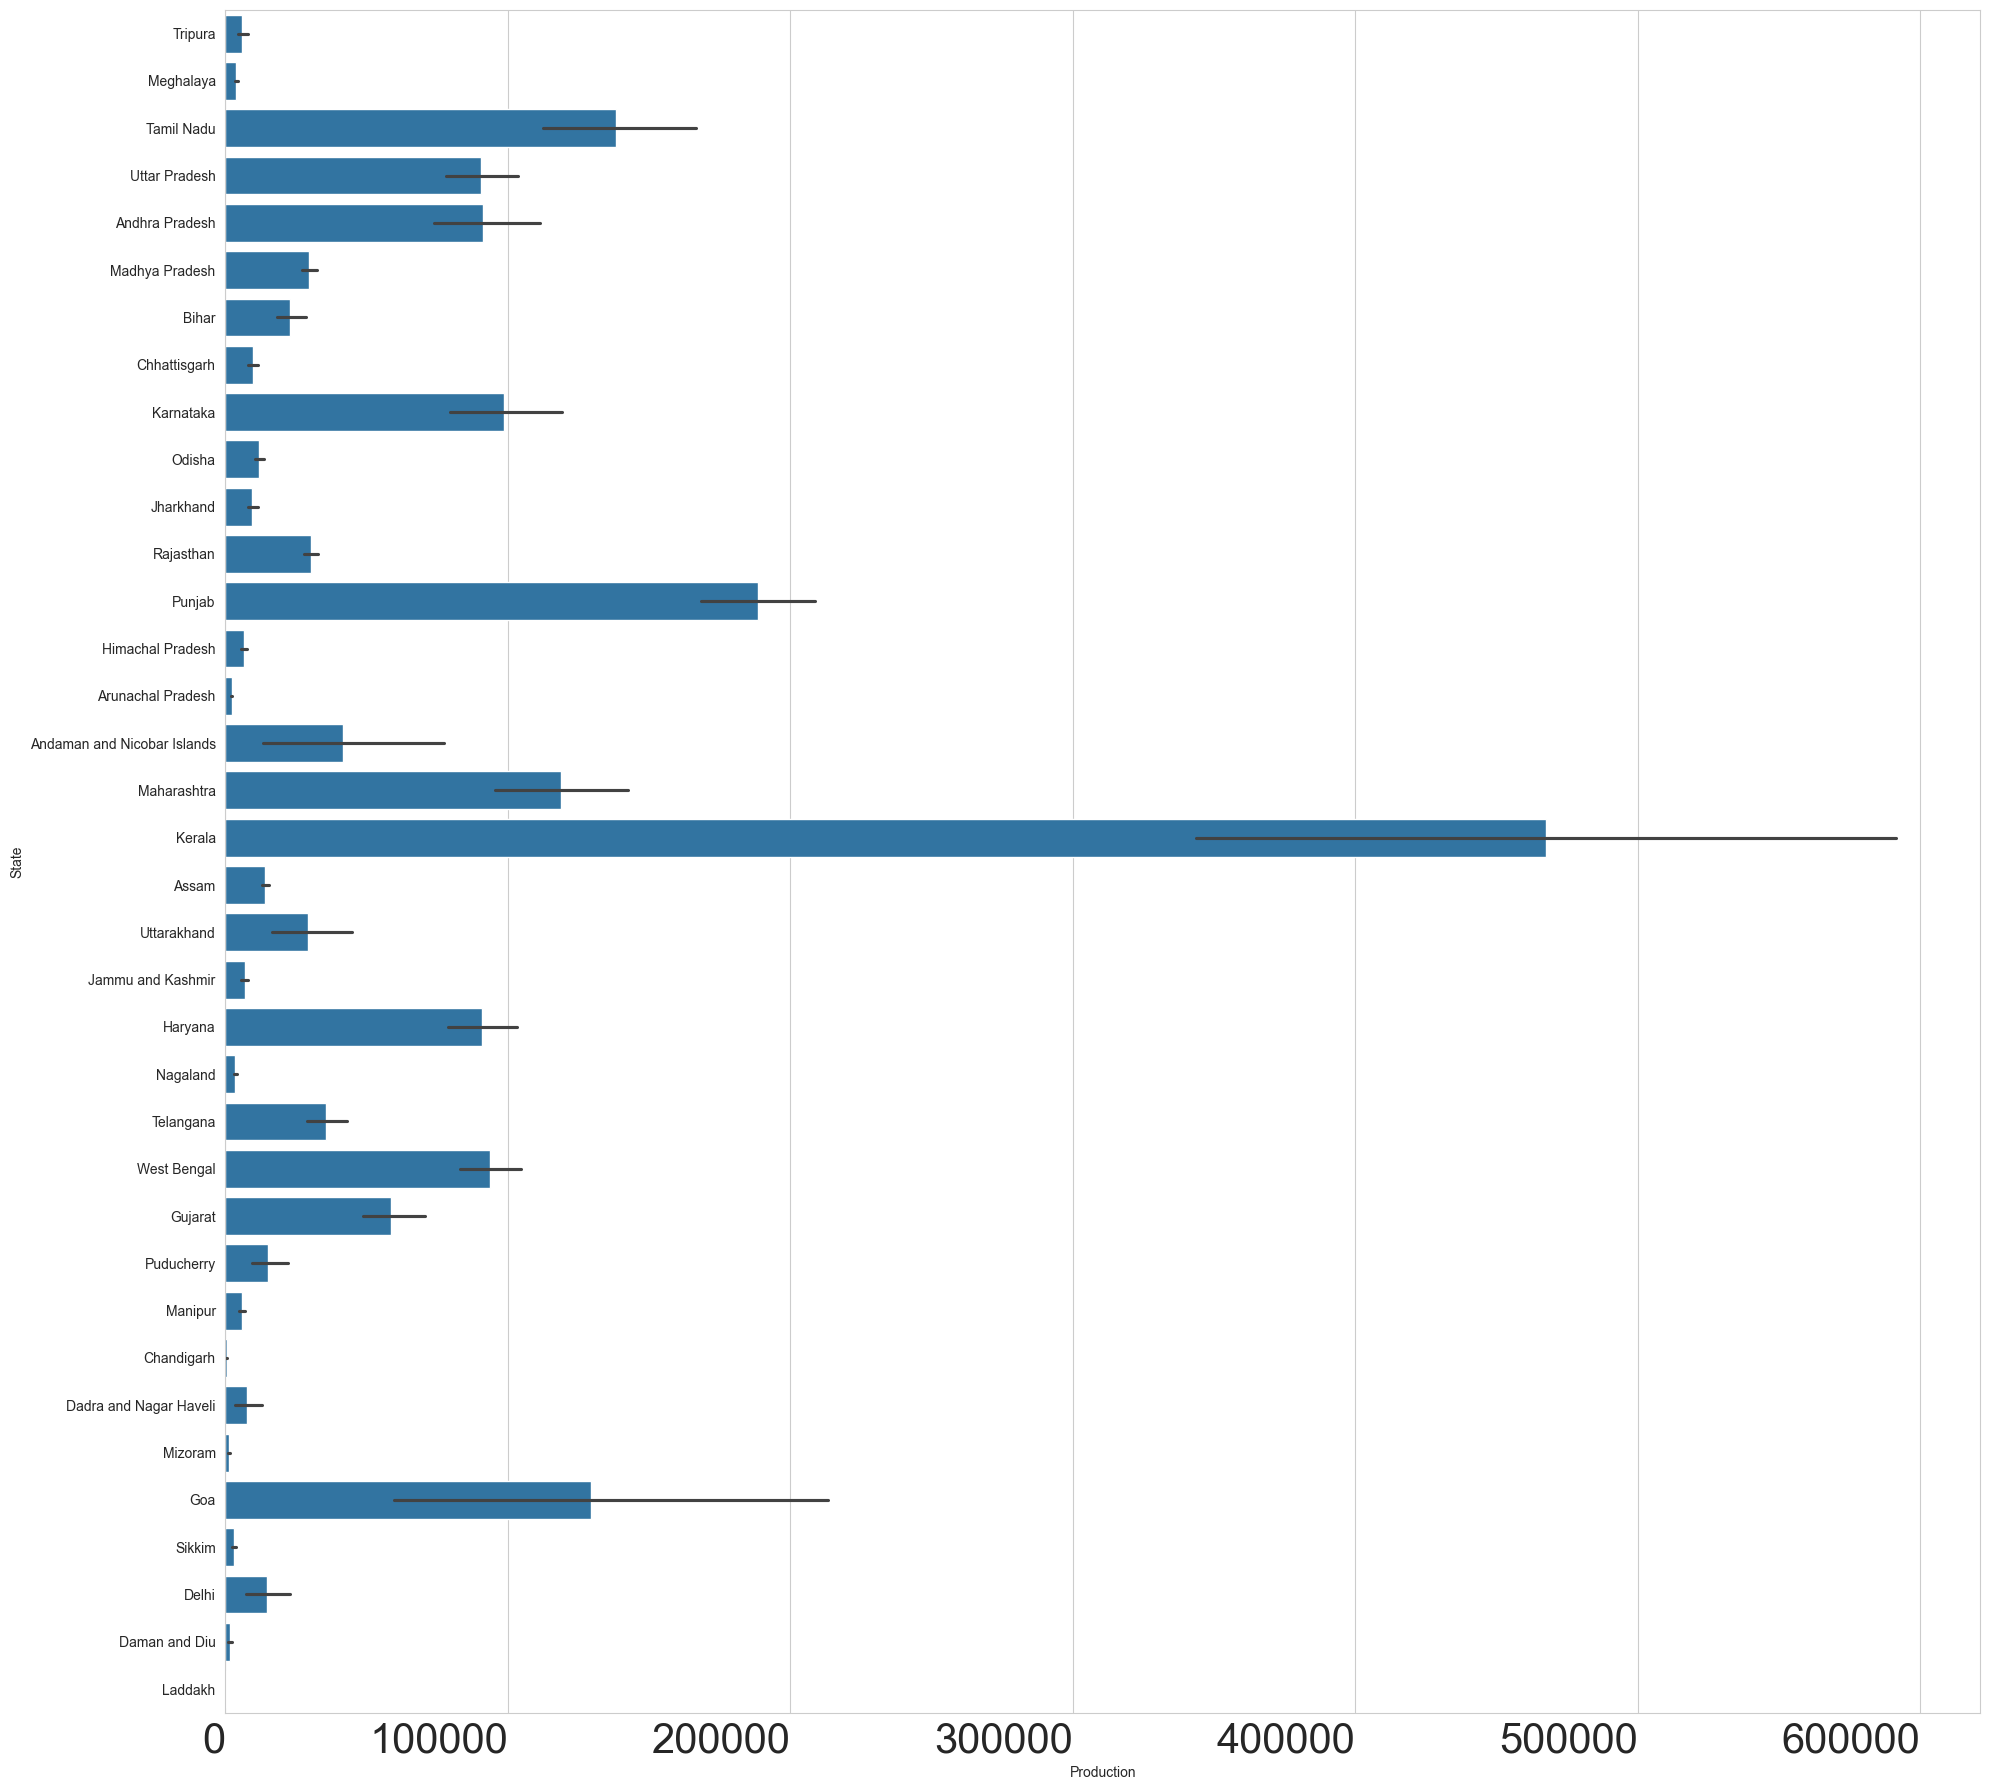

In [29]:
plt.figure(figsize=(20,18))
ax=sns.barplot(x=df['Production'],y=df['State'])
plt.setp(ax.get_xticklabels(),rotation=0, ha="right",fontsize=30)
plt.tight_layout()
plt.show()

***We can see from above graph Kerela ,Punjab,up ,Maharashtra and Goa are states which produces most crop in india***

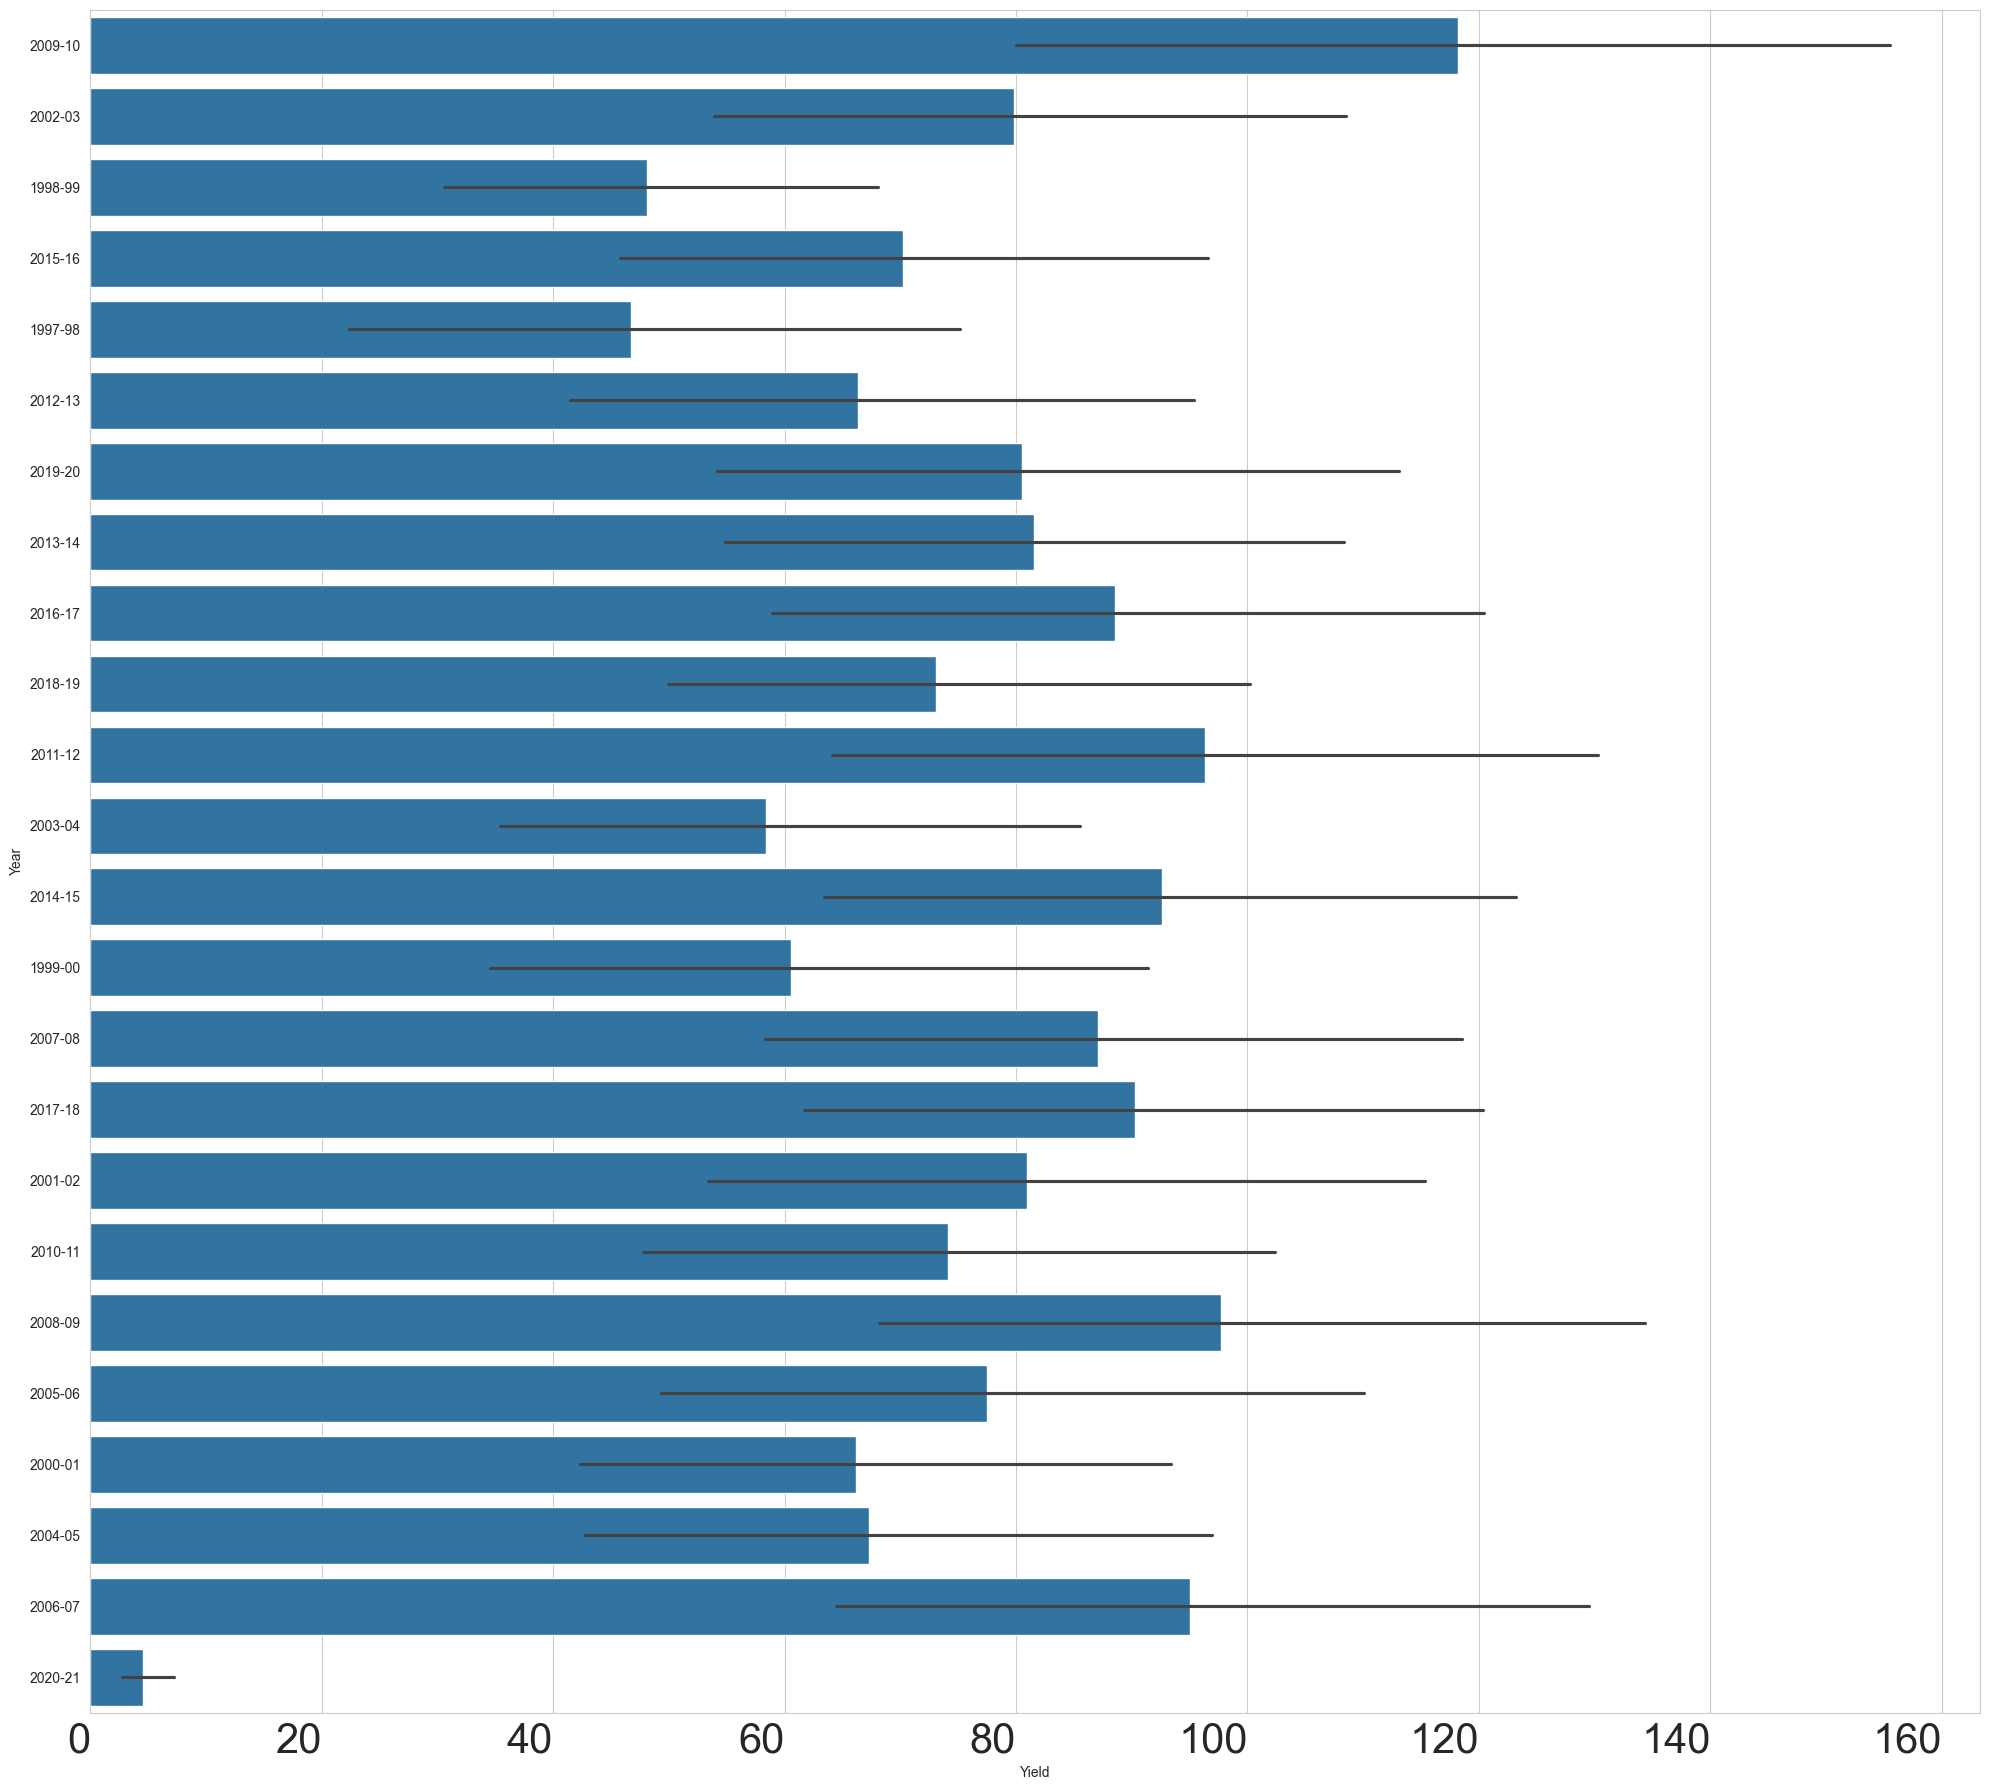

In [30]:
plt.figure(figsize=(20,18))
ax=sns.barplot(x=df['Yield'],y=df['Year'])
plt.setp(ax.get_xticklabels(),rotation=0, ha="right",fontsize=30)
plt.tight_layout()
plt.show()

***Due to covid in 2020-2021 india's production of crop is less ***

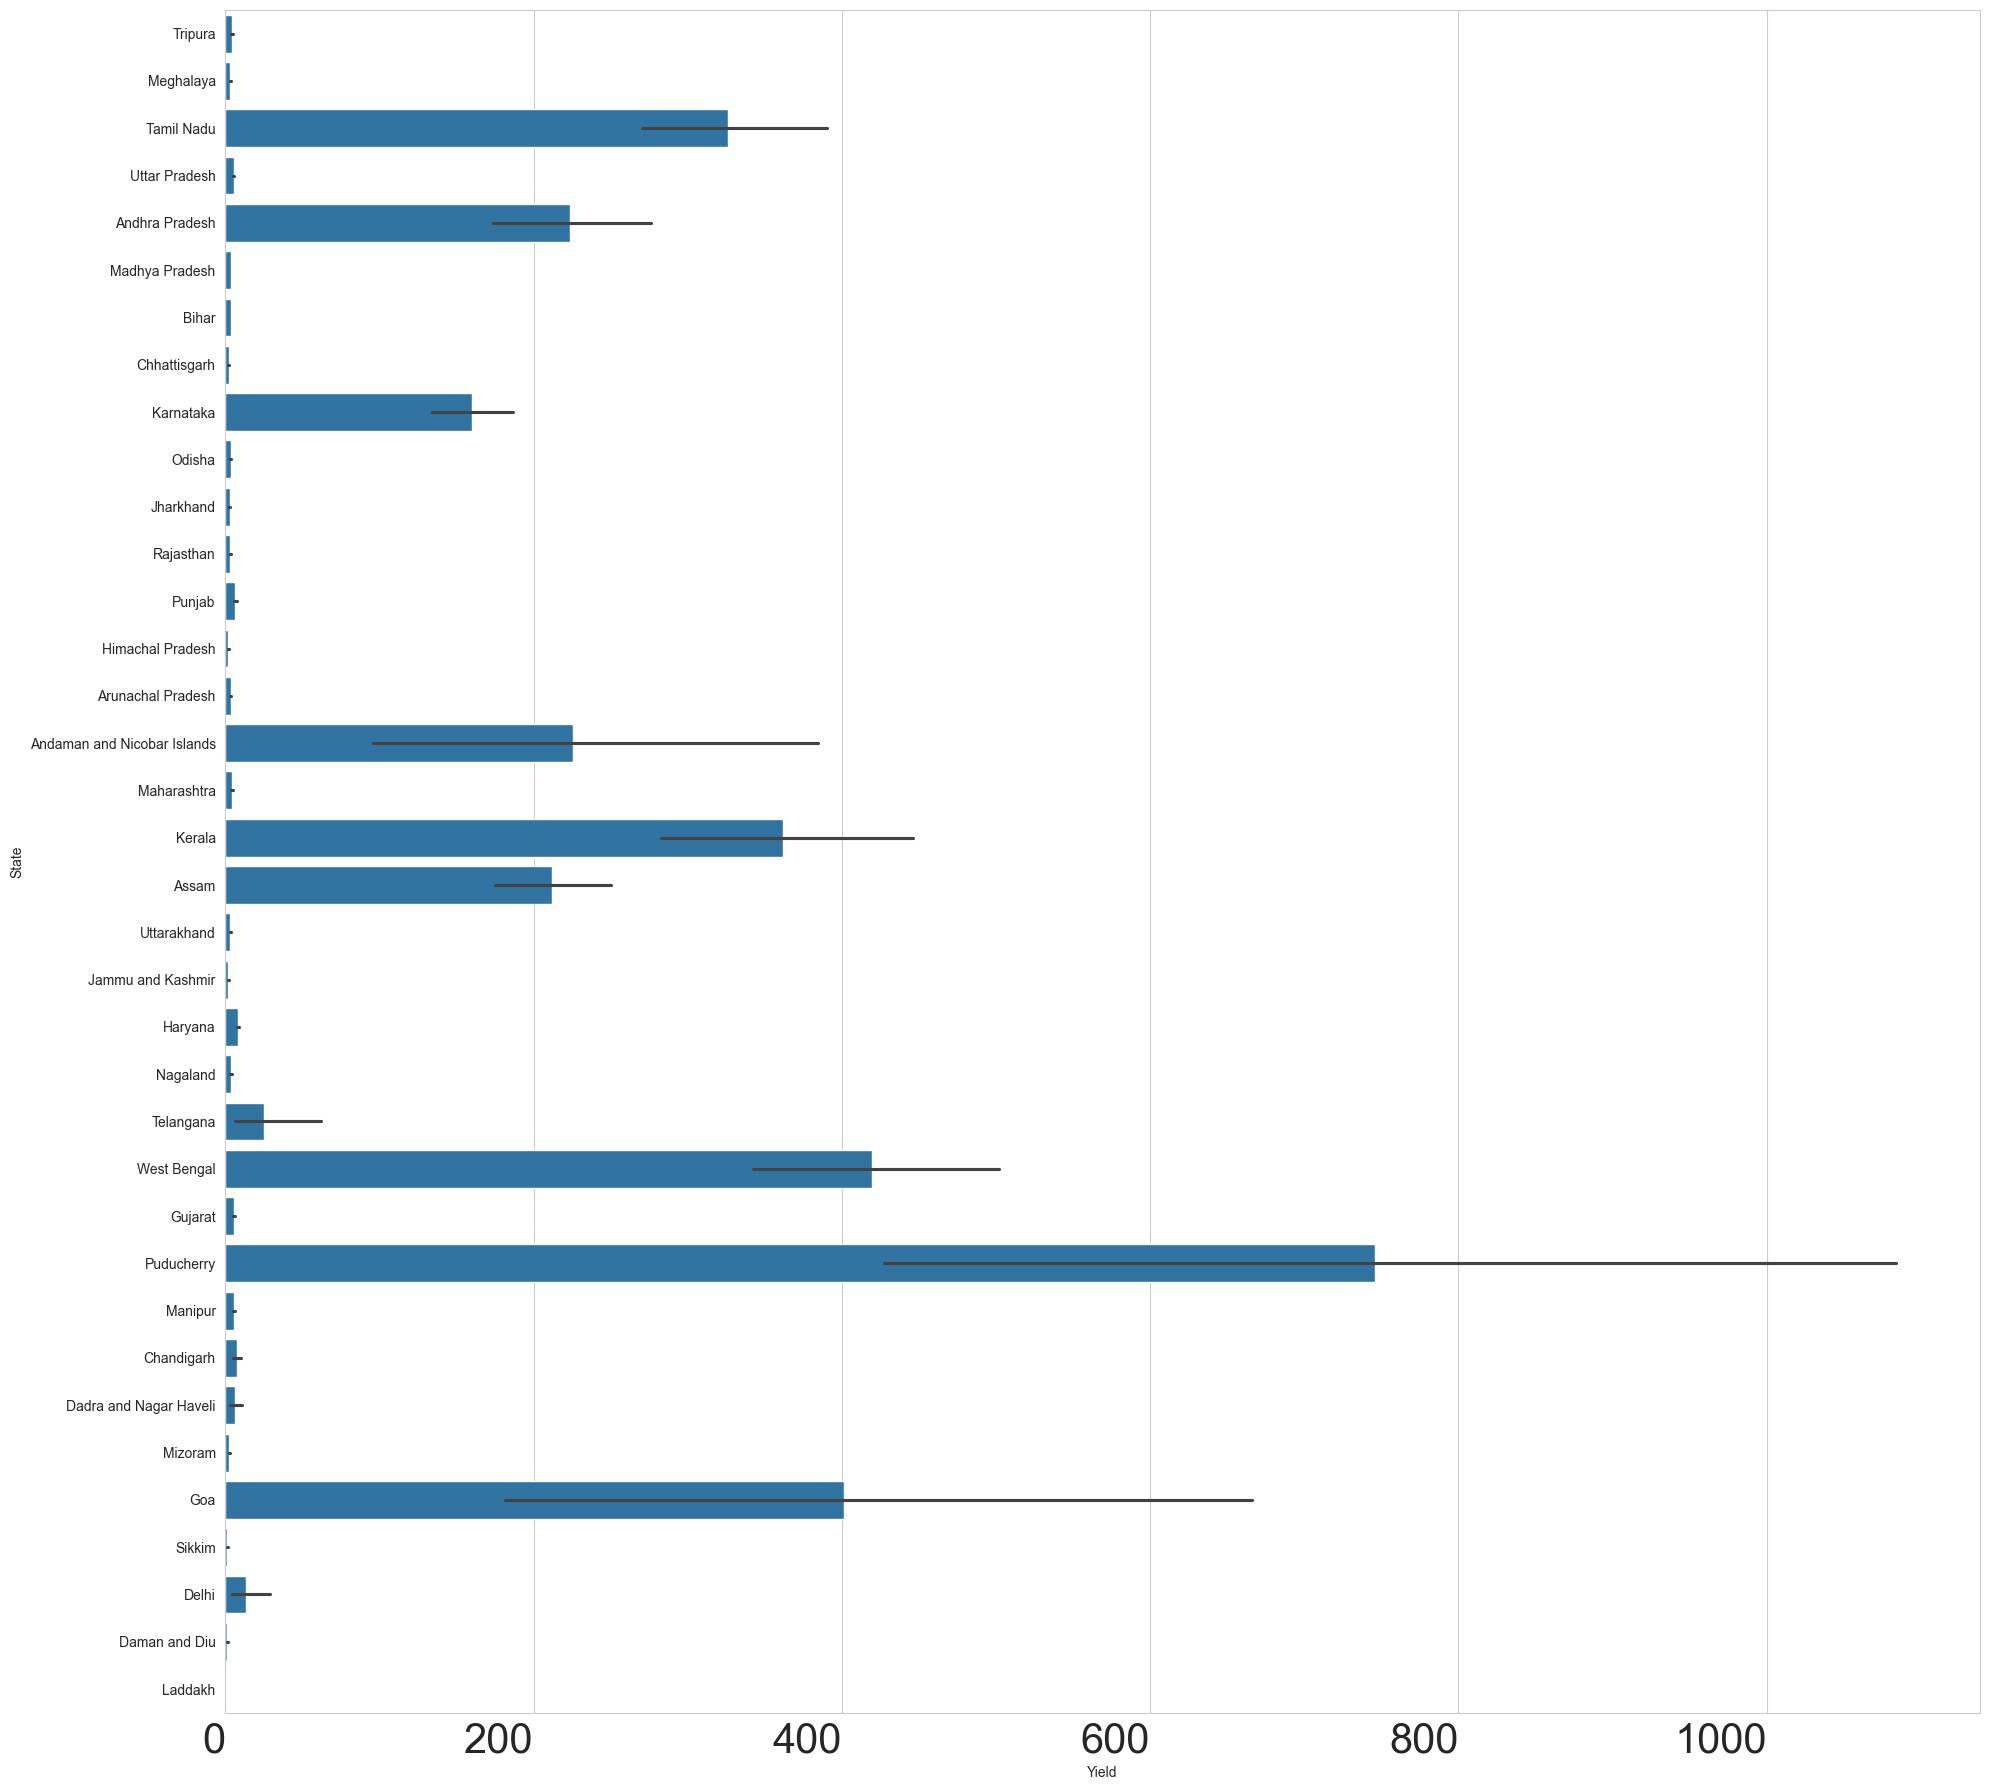

In [31]:
plt.figure(figsize=(20,18))
ax=sns.barplot(x=df['Yield'],y=df['State'])
plt.setp(ax.get_xticklabels(),rotation=0, ha="right",fontsize=30)
plt.tight_layout()
plt.show()

***We can see from above graph Puducherry,Kerela ,West Bangal,Tamil nadu ,Andman and Nicobar island and Goa are states which yields most crop in india ***

***As we can see that some states have highest yield whether some have low yield compare to other states. This Shows that there is still proper education regarding agriculture have not reached in some parts of country.Whether some states like in south india have proper education due to which they have better yield than some north indian states.***


In [32]:
df

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
121231,Tripura,WEST TRIPURA,Arhar/Tur,2009-10,Kharif,257.0,Hectare,185.0,Tonnes,0.719844
112176,Meghalaya,EAST JAINTIA HILLS,Maize,2009-10,Kharif,3028.0,Hectare,3590.0,Tonnes,1.185601
33978,Tamil Nadu,THENI,Sweet potato,2002-03,Whole Year,2.0,Hectare,27.0,Tonnes,13.500000
337524,Uttar Pradesh,LUCKNOW,Linseed,1998-99,Rabi,73.0,Hectare,28.0,Tonnes,0.383562
177092,Andhra Pradesh,VISAKHAPATANAM,Cowpea(Lobia),2015-16,Rabi,554.0,Hectare,187.0,Tonnes,0.337545
...,...,...,...,...,...,...,...,...,...,...
239025,Haryana,MAHENDRAGARH,Garlic,2017-18,Whole Year,12.0,Hectare,220.0,Tonnes,18.333333
111610,Manipur,CHURACHANDPUR,Banana,2007-08,Whole Year,4400.0,Hectare,56590.0,Tonnes,12.861364
318259,Madhya Pradesh,UMARIA,Barley,1998-99,Rabi,700.0,Hectare,400.0,Tonnes,0.571429
134789,Assam,DIMA HASAO,Rice,2011-12,Autumn,6590.0,Hectare,8923.0,Tonnes,1.354021


# Reccomendation system 



***Now Let's try to build a recommendation system based on some inputs and recommend  some  crops based on that. ***

In [33]:
data=df[['State','District','Season','Area','Crop']]

In [34]:
data['Crop'].value_counts()

Crop
Rice                     5421
Maize                    5163
Moong(Green Gram)        3655
Urad                     3613
Sesamum                  3185
Groundnut                3063
Onion                    2752
Wheat                    2749
Rapeseed &Mustard        2710
Arhar/Tur                2671
Sugarcane                2658
Potato                   2560
Gram                     2514
Jowar                    2452
Dry chillies             2255
Bajra                    1929
Peas & beans (Pulses)    1780
Sunflower                1767
Small millets            1736
Cotton(lint)             1589
Masoor                   1566
Ragi                     1485
Turmeric                 1465
Barley                   1453
Sweet potato             1425
Linseed                  1413
Other Kharif pulses      1396
Horse-gram               1296
Garlic                   1270
Coriander                1260
Soyabean                 1259
Ginger                   1176
Castor seed              1127
Other

In [35]:
data = data[data['Crop'].isin(['Rice','Maize',"Moong(Green Gram)",'Urad','Groundnut','Wheat','Rapeseed &Mustard','Sugarcane','Arhar/Tur','Potato','Onion','Gram','Jowar','Dry Chilies','Bajra',"Peas & beans (Pulses)",'Sunflower','Banana','Coconut','Khesari','Small millets','Cotton(lint)','Masoor','Turmeric','Barley','Linseed ']
)]             

In [36]:
data['State'].unique()

array(['Tripura', 'Meghalaya', 'Uttar Pradesh', 'Madhya Pradesh', 'Bihar',
       'Karnataka', 'Jharkhand', 'Rajasthan', 'Punjab',
       'Himachal Pradesh', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala',
       'Assam', 'Uttarakhand', 'Jammu and Kashmir', 'Haryana',
       'Chhattisgarh', 'Nagaland', 'Maharashtra', 'Odisha', 'West Bengal',
       'Gujarat', 'Puducherry', 'Andaman and Nicobar Islands',
       'Arunachal Pradesh', 'Telangana', 'Manipur', 'Chandigarh',
       'Mizoram', 'Dadra and Nagar Haveli', 'Sikkim', 'Delhi', 'Goa',
       'Daman and Diu'], dtype=object)

In [37]:
state=pd.get_dummies(data['State'],drop_first=True)
district=pd.get_dummies(data['District'],drop_first=True)
season=pd.get_dummies(data['Season'],drop_first=True)


In [38]:
new_data=pd.concat([data,state,district,season],axis=1)
new_data=new_data.drop(['Season','State','District'],axis=1)

In [39]:
new_data

,Area,Crop,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,...,YADGIR,YAMUNANAGAR,YANAM,YAVATMAL,ZUNHEBOTO,Kharif,Rabi,Summer,Whole Year,Winter
121231,257.0,Arhar/Tur,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
112176,3028.0,Maize,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
335930,113.0,Bajra,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
151878,28.0,Cotton(lint),False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7001,23959.0,Moong(Green Gram),False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279888,90.0,Moong(Green Gram),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
111610,4400.0,Banana,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
318259,700.0,Barley,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
134789,6590.0,Rice,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
crops=new_data['Crop'].unique()
 


In [41]:
lst =list(enumerate(crops))
dct={}
for i in range(len(lst)):
    dct.update({crops[i]:i})

In [42]:
crops

array(['Arhar/Tur', 'Maize', 'Bajra', 'Cotton(lint)', 'Moong(Green Gram)',
       'Rapeseed &Mustard', 'Onion', 'Sugarcane', 'Urad', 'Gram', 'Rice',
       'Peas & beans (Pulses)', 'Turmeric', 'Coconut', 'Small millets',
       'Sunflower', 'Wheat', 'Groundnut', 'Jowar', 'Potato', 'Barley',
       'Masoor', 'Banana', 'Khesari'], dtype=object)

In [43]:
new_data['Crop']=new_data['Crop'].map(dct)

In [44]:
new_data

,Area,Crop,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,...,YADGIR,YAMUNANAGAR,YANAM,YAVATMAL,ZUNHEBOTO,Kharif,Rabi,Summer,Whole Year,Winter
121231,257.0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
112176,3028.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
335930,113.0,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
151878,28.0,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7001,23959.0,4,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279888,90.0,4,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
111610,4400.0,22,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
318259,700.0,20,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
134789,6590.0,10,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
X=new_data.drop('Crop',axis=1)
Y=new_data['Crop']


In [46]:
df['Crop'].value_counts()

Crop
Rice                     5421
Maize                    5163
Moong(Green Gram)        3655
Urad                     3613
Sesamum                  3185
Groundnut                3063
Onion                    2752
Wheat                    2749
Rapeseed &Mustard        2710
Arhar/Tur                2671
Sugarcane                2658
Potato                   2560
Gram                     2514
Jowar                    2452
Dry chillies             2255
Bajra                    1929
Peas & beans (Pulses)    1780
Sunflower                1767
Small millets            1736
Cotton(lint)             1589
Masoor                   1566
Ragi                     1485
Turmeric                 1465
Barley                   1453
Sweet potato             1425
Linseed                  1413
Other Kharif pulses      1396
Horse-gram               1296
Garlic                   1270
Coriander                1260
Soyabean                 1259
Ginger                   1176
Castor seed              1127
Other

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=567)

In [49]:
x_train.shape,y_train.shape

((46025, 756), (46025,))

In [50]:
## import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)

In [55]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca.shape

(57766, 2)

In [52]:
feature_scale= [feature for feature in new_data.columns if feature!='Crop']
new_data=pd.concat([new_data['Crop'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X), columns=feature_scale)],
                    axis=1)
new_data

,Crop,Area,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,...,YADGIR,YAMUNANAGAR,YANAM,YAVATMAL,ZUNHEBOTO,Kharif,Rabi,Summer,Whole Year,Winter
0,0,0.000268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.003162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0.000118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0.025018,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57527,4,0.000094,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57528,22,0.004594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57529,20,0.000731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57530,10,0.006881,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
x_train.columns
   

Index(['Area', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'Delhi',
       ...
       'YADGIR', 'YAMUNANAGAR', 'YANAM', 'YAVATMAL', 'ZUNHEBOTO', 'Kharif',
       'Rabi', 'Summer', 'Whole Year', 'Winter'],
      dtype='object', length=756)

In [54]:
model_1 = LogisticRegression()
model_2 = KNeighborsClassifier(n_neighbors=21)
model_3 = RandomForestClassifier()

In [55]:
model=VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=21)),
                             ('rf', RandomForestClassifier())],
                             voting='soft')

***As  we got log loss value is nearer to 0 . So Model is decent one.** *